FloatSlider(value=0.001, description='tol:', max=1.0, step=0.001)

IntSlider(value=0, description='t:', max=1023)

IntRangeSlider(value=(0, 512), continuous_update=False, description='x Range', max=1023)

IntRangeSlider(value=(0, 512), continuous_update=False, description='y Range', max=1023)

IntRangeSlider(value=(0, 512), continuous_update=False, description='z Range', max=1023)

RadioButtons(description='Axis to slide along :', options=('x', 'y', 'z'), value='x')

IntSlider(value=0, description='axis val:', max=1023)

Output()

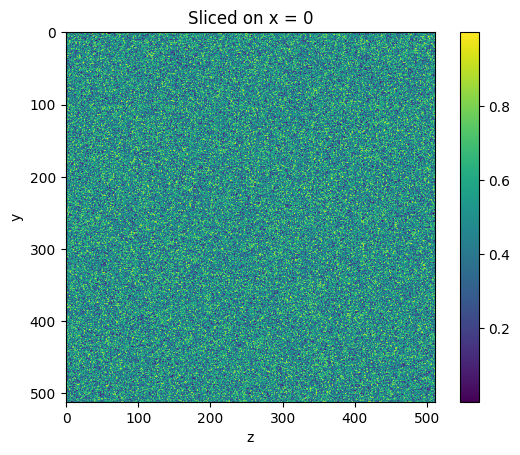

In [8]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Create the 3D numpy array with dimensions 1024x1024x1024
shape_3d = (1024, 1024, 1024)
three_d_array = np.random.rand(*shape_3d)

# Create tolerance bar
tol_bar = widgets.FloatSlider(
    value=0.001,       # Initial value
    min=0,         # Minimum value
    max=1,       # Maximum value
    step=0.001,        # Step size
    description='tol:'
)

# Create an timespte bar
t_slider = widgets.IntSlider(
    value=0,       # Initial value
    min=0,         # Minimum value
    max=1023,       # Maximum value
    step=1,        # Step size
    description='t:'
)

# Create range sliders for x, y, and z
x_range = widgets.IntRangeSlider(
    value=[0, 512],
    min=0,
    max=1023,
    step=1,
    description='x Range',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

y_range = widgets.IntRangeSlider(
    value=[0, 512],
    min=0,
    max=1023,
    step=1,
    description='y Range',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

z_range = widgets.IntRangeSlider(
    value=[0, 512],
    min=0,
    max=1023,
    step=1,
    description='z Range',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

xyz_buttons = widgets.RadioButtons(
    options=['x','y','z'],
#     value='pineapple',
    description='Axis to slide along :',
    disabled=False
)

xyz_axis = widgets.IntSlider(
    value=0,       # Initial value
    min=0,         # Minimum value
    max=1023,       # Maximum value
    step=1,        # Step size
    description='axis val:'    
)

# Create an output widget to display the observed values
observed_output = widgets.Output()

# Define the observer function to observe changes in the range sliders
def observe_ranges(change):
    with observed_output:
        observed_output.clear_output()
        x_val, y_val, z_val = x_range.value, y_range.value, z_range.value
        axis = xyz_buttons.value
        axis_val = xyz_axis.value
        print("x Range:", x_val)
        print("y Range:", y_val)
        print("z Range:", z_val)
        print("Sliced on {} = {}".format(axis,axis_val))

# Define a function to project and display a 2D image
def project_and_display_image(axis,value):
    axis = xyz_buttons.value
    axis_val = int(xyz_axis.value)
    
    if axis == 'x':
        y_start, y_end = int(y_range.value[0]), int(y_range.value[1])
        z_start, z_end = int(z_range.value[0]), int(z_range.value[1])
        image = three_d_array[axis_val, y_start:y_end, z_start:z_end]
    elif axis == 'y':
        x_start, x_end = int(x_range.value[0]), int(x_range.value[1])
        z_start, z_end = int(z_range.value[0]), int(z_range.value[1])
        image = three_d_array[x_start:x_end, axis_val, z_start:z_end]
    else:
        x_start, x_end = int(x_range.value[0]), int(x_range.value[1])
        y_start, y_end = int(y_range.value[0]), int(y_range.value[1])
        image = three_d_array[x_start:x_end, y_start:y_end, axis_val]

    plt.imshow(image, cmap='viridis')
    plt.colorbar()
    plt.title("Sliced on {} = {}".format(axis,value))
    
    if axis == 'x':
        plt.xlabel("z")
        plt.ylabel("y")
    if axis == 'y':
        plt.xlabel("x")
        plt.ylabel("z")
    if axis == 'z':
        plt.xlabel("x")
        plt.ylabel("y")
    plt.show()


# Define the observer function to observe changes in the range sliders, axis selection, or axis value
def observe_ranges(change):
    with observed_output:
        observed_output.clear_output()
        x_val, y_val, z_val = x_range.value, y_range.value, z_range.value
        axis = xyz_buttons.value
        axis_val = int(xyz_axis.value)
        print("x Range:", x_val)
        print("y Range:", y_val)
        print("z Range:", z_val)
        print("Sliced on {} = {}".format(axis, axis_val))
        project_and_display_image(axis,axis_val)

# Observe changes in the range sliders and call the observer function
x_range.observe(observe_ranges)
y_range.observe(observe_ranges)
z_range.observe(observe_ranges)
xyz_buttons.observe(observe_ranges)
xyz_axis.observe(observe_ranges)

# Display the range sliders, axis selection, axis value, and the output widget
display(tol_bar)
display(t_slider)
display(x_range)
display(y_range)
display(z_range)
display(xyz_buttons)
display(xyz_axis)
display(observed_output)

# Initial projection and display
project_and_display_image('x',0)
